In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read test dataset
path_to_data = 'data/'
X_test = pd.read_csv(path_to_data + 'Xte.csv',header = None)
Y_train = pd.read_csv(path_to_data + 'Ytr.csv')
X_train = pd.read_csv(path_to_data + 'Xtr.csv',header = None)

In [110]:
image = np.zeros((1024,3))
for i in range(1024):
        for k in range(3):
            image[i,k] =  X_test.values[0,k*1024+i]
image_reshaped_1 = image.reshape((32,32,3))

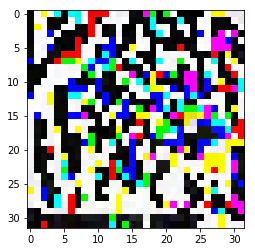

In [111]:
plt.imshow(image_reshaped_1)
plt.show()

In [3]:
X_train.shape

(5000, 3073)

In [4]:
Y_tot_test = Y_train["Prediction"].values[-10:]

In [5]:
Y_tot_test

array([5, 2, 5, 8, 0, 4, 3, 1, 7, 5])